## PROBLEM 1 

- Problem Statement :
   - Check the trend of investments over the years. To check the trend, find -
   - Total number of fundings done in each year.
   -  Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
   -  Print year-wise total number of fundings also. Print years in ascending order.
- Note :
    - There is some error in the 'Date' feature. Make sure to handle that.

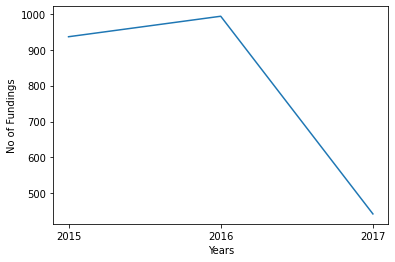

2015 936
2016 993
2017 443


In [30]:
import matplotlib.pyplot as plt
import collections
import csv
df=open("Datasets/startup_funding.csv",encoding='utf-8')
df_data=csv.DictReader(df,skipinitialspace=True)
df_list=list(df_data)
# df_list[df_list.CityLocation!=""]
dic={}
for row in df_list:
    key=row["Date"][-4:]
    if key in dic:
        dic[key]+=1
    else:
        dic[key]=1
ord_dic=collections.OrderedDict(sorted(dic.items()))
a=list(ord_dic.keys())
b=list(ord_dic.values())
plt.xlabel("Years")
plt.ylabel("No of Fundings")
plt.plot(a,b)
plt.show()
for ele in ord_dic:
    print(ele,ord_dic[ele])

## PROBLEM 2

- Problem Statement :
    - Find out which cities are generally chosen for starting a startup.
    - Find top 10 Indian cities which have most number of startups ?
    - Plot a pie chart and visualise it.
    - Print the city name and number of startups in that city also.
- Note :
    - Take city name "Delhi" as "New Delhi".
    - Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is g g         given. Take city name as "Bangalore".
     - For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup      also. Indian city name is first.
- Print the city in descending order with respect to the number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


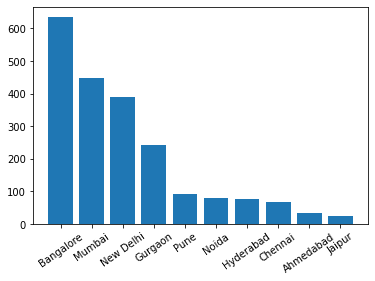

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('Datasets/startup_funding.csv',encoding = 'utf-8')
df
# df['CityLocation'].dropna(inplace=True)
df.dropna(subset=["CityLocation"],inplace=True)
df
# #df.tail()
def separateCity(city): 
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity) 
df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'

city = df['CityLocation']
city = city.value_counts()[:10]
city_name = city.index
no_of_str = city.values
for i in range(0,10):
    print(city_name[i],no_of_str[i])
plt.bar(city_name,no_of_str)
plt.xticks(rotation=35)
plt.show()

## PROBLEM 3

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


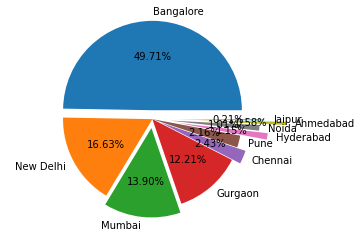

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["CityLocation","AmountInUSD"],inplace=True)
def fun(split_city):
    return split_city.split("/")[0].strip()
df.CityLocation=df.CityLocation.apply(fun)
df.CityLocation.replace("bangalore","Bangalore",inplace=True)
df.CityLocation.replace("Delhi","New Delhi",inplace=True)
def fun1(split_num):
    a= float(split_num.replace(",",""))
    return int(a)
df.AmountInUSD=df.AmountInUSD.apply(fun1)
df=df.groupby("CityLocation")["AmountInUSD"].sum()
df=df.sort_values(ascending=False)[0:10]
city=df.index
value=df.values
total_sum=sum(value)
for i in range(0,10):
    print(city[i],"%.2f"%((value[i]/total_sum)*100))
explode=[0.2,0.0,0.2,0.0,0.2,0,0.6,0.4,1,0.5]
plt.pie(value,labels=city,autopct="%.2f%%",explode=explode,radius=2)
plt.axis("equal")
plt.show()

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


2088

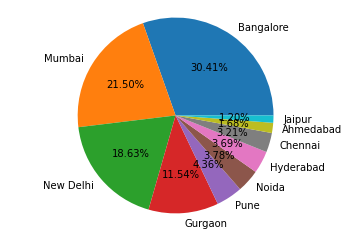

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Datasets/startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=['CityLocation'],inplace=True)
def fun(city_split):
    return city_split.split("/")[0].strip()
df.CityLocation=df.CityLocation.apply(fun)

df[df.CityLocation=="bangalore"]="Bangalore"
df[df.CityLocation=="Delhi"]="New Delhi"
a=df.CityLocation.value_counts()[:10]
city=a.index
value=a.values
plt.pie(value,labels=city,autopct="%.2f%%")
plt.axis('equal')
for i in range(0,10):
    print(city[i],value[i])
sum(value)

Bangalore 49.71%
New Delhi 16.63%
Mumbai 13.90%
Gurgaon 12.21%
Chennai 2.43%
Pune 2.16%
Hyderabad 1.15%
Noida 1.01%
Ahmedabad 0.58%
Jaipur 0.21%


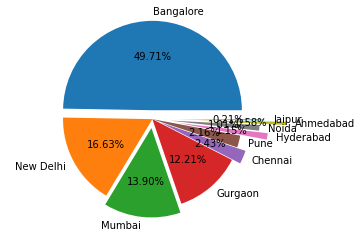

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["CityLocation","AmountInUSD"],inplace=True)
# def fun1(split_num):
#     a= float(split_num.replace(",",""))
#     return int(a)
# df.AmountInUSD=df.AmountInUSD.apply(fun1)

def fun(split_city):
    return split_city.split("/")[0].strip()
df.CityLocation=df.CityLocation.apply(fun)
df.CityLocation.replace("bangalore","Bangalore",inplace=True)
df.CityLocation.replace("Delhi","New Delhi",inplace=True)
def fun1(split_num):
    a= float(split_num.replace(",",""))
    return int(a)
df.AmountInUSD=df.AmountInUSD.apply(fun1)


# df.AmountInUSD=df.AmountInUSD.apply(lambda x:int(str(x).replace(",","")))
# df.AmountInUSD.values

df=df.groupby("CityLocation")["AmountInUSD"].sum()
df=df.sort_values(ascending=False)[0:10]
city=df.index
value=df.values
total_sum=sum(value)
for i in range(0,10):
    print(city[i],"%.2f"%((value[i]/total_sum)*100)+"%")
explode=[0.2,0.0,0.2,0.0,0.2,0,0.6,0.4,1,0.5]
plt.pie(value,labels=city,autopct="%.2f%%",explode=explode,radius=2)
plt.axis("equal")
plt.show()

## PROBLEM 4

- Problem Statement :
    - There are 4 different type of investments. Find out percentage of amount funded for each investment type.
    - Plot a pie chart to visualise.
    - Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
- Note :
     - Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".        - Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
- Print the investment type in descending order with respect to the percentage of the amount funded.


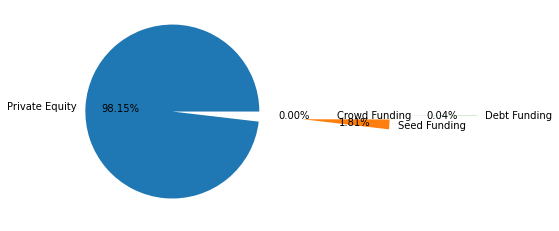

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["AmountInUSD","InvestmentType"],inplace=True)
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)

df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)
df.AmountInUSD=df.AmountInUSD.apply(lambda x:int(str(x).replace(",","")))

df=df.groupby("InvestmentType")["AmountInUSD"].sum()
df=df.sort_values(ascending=False)
ins_type=df.index
amount=df.values
explode=[0.7,0.8,1.8,0.1]
plt.pie(amount,labels=ins_type,explode=explode,autopct="%.2f%%")
plt.show()
amount_sum=sum(amount)
for i in range(len(amount)):
    print(ins_type[i],"%.2f"%((amount[i]/amount_sum)*100))

# PROBLEM 5

- Problem Statement :
    - Which type of companies got more easily funding. To answer this question, find -
    - Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
    - Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
- Note :
    - Ecommerce is the right word in IndustryVertical, so correct it.
- Print the industry in descending order with respect to the percentage of the amount funded.

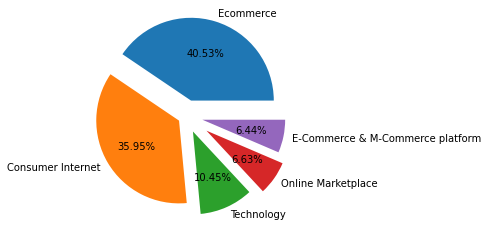

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["IndustryVertical","AmountInUSD"],inplace=True)
# a=df.IndustryVertical.value_counts()
# for ele in a.index:
#     print(ele)
# df[df.IndustryVertical=="eCommerce"]="ECommerce"
df.IndustryVertical.replace("eCommerce","Ecommerce",inplace=True)
df.IndustryVertical.replace("ecommerce","Ecommerce",inplace=True)
df.IndustryVertical.replace("ECommerce","Ecommerce",inplace=True)

df.AmountInUSD=df.AmountInUSD.apply(lambda x:int(str(x).replace(",","")))
df=df.groupby("IndustryVertical")["AmountInUSD"].sum()
df=df.sort_values(ascending=False)[:5]
company=df.index
investment=df.values
explode=[0.2,0.1,0.2,0.3,0.2]
plt.pie(investment,labels=company,autopct="%.2f%%",explode=explode)
plt.axis("equal")
plt.show()
total=sum(investment)
for i in range(len(investment)):
    print(company[i],"%.2f"%((investment[i]/total)*100))



## PROBLEM 6

- Problem Statement :
    - Find top 5 startups with most amount of total funding.
    - Print the startup name in descending order with respect to amount of funding.
- Note:
    - Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names,          ignore correcting all, just handle important ones.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["AmountInUSD"],inplace=True)
# a=df.StartupName.value_counts()
# for ele in a.index:
#     print(ele)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Filpkart.com","Flipkart",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df.AmountInUSD=df.AmountInUSD.apply(lambda x:int(str(x).replace(",","")))
df=df.groupby("StartupName")["AmountInUSD"].sum()
df=df.sort_values(ascending=False)[0:5]
startup_name=df.index
value=df.values
for i in range(len(startup_name)):
    print(startup_name[i],value[i])


Paytm 2340000000
Flipkart 2259700000
Ola 1899500000
Snapdeal 700000000
Oyo 637000000


## PROBLEM 7 

- Problem Statement :
    - Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
    - Print the startup name in descending order with respect to the number of funding round as integer value.
- Note:
    - Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Filpkart.com","Flipkart",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df=df.StartupName.value_counts()
df=df.sort_values(ascending=False)[0:5]
name=df.index
value=df.values
for i in range(len(name)):
    print(name[i],value[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# PROBLEM 8

- Problem Statement :
    - Find the Investors who have invested maximum number of times.
    - Print the investor name and number of times invested as integer value.
- Note:
    - In startup, multiple investors might have invested. So consider each investor for that startup.
      Ignore the undisclosed investors.

In [2]:
import pandas as pd
# import collections
df=pd.read_csv("Datasets/startup_funding.csv",encoding="utf=8")
df.dropna(subset=["InvestorsName","AmountInUSD"],inplace=True)
df=df.InvestorsName
df
each_name=[]
for ele in df.values:
    split_names=ele.split(",")
    for name in split_names:
        each_name.append(name.strip())
dic={}
for ele in each_name:
    if ele in dic:
        dic[ele]+=1
    else:
        dic[ele]=1
# ord_dic=collections.OrderedDict(sorted(dic.items()))
# a=list(ord_dic.keys())
# b=list(ord_dic.values())
# for ele in b:
#     print(ele)
# dct_keys = sorted(dic,key=dct.get,reverse=True)
# print(dct_keys[0],dic[dct_keys[0]])
ord_dic=sorted(dic, key=dic.get,reverse=True)
print(ord_dic[0],dic[ord_dic[0]])

Sequoia Capital 60
